In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
# client = MongoClient("mongodb://13.127.57.185:27017/")
# client.list_database_names()
# db = client['pvvnl']
# db.list_collection_names()
# collection = db["load_profile_jdvvnl"]
# data = collection.find({'sensor_id': '0000e2fc-8dad-4d82-9da6-88695cc94265'})
# l = []
# for _ in data:
#     l.append(_)
#     # print(_)
# df = pd.DataFrame(l)
# df

In [2]:
df = pd.read_csv("single_feeder_data_jdvvnl.csv", low_memory=False)
df = df[['sensor_id', 'instant_cum_KW', 'instant_cum_KVA', 'R_Voltage',
       'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current', 'B_Current', 'R_PF',
       'Y_PF', 'B_PF', 'cumm_PF', 'status', 'date',
       'creation_time', 'opening_KWh', 'opening_KVAh', 'closing_KWh',
       'closing_KVAh', 'count'
       ]]
dff = df[df['status']=="P"]
cols_to_divide = ['instant_cum_KW', 'instant_cum_KVA', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 
                  'R_Current', 'Y_Current', 'B_Current', 'R_PF', 'Y_PF', 'B_PF', 'cumm_PF']

# Ensure you're using .loc to modify the original dataframe
dff.loc[:, cols_to_divide] = dff[cols_to_divide].apply(lambda x: x / dff['count'], axis=0)
data = dff[["creation_time",'instant_cum_KW']]
data.reset_index(drop=True ,inplace=True)
data = data.copy()  # Create a copy
data.rename(columns={"instant_cum_KW":'Load_kW'},inplace=True)
data['creation_time'] = pd.to_datetime(data['creation_time'])
data.set_index('creation_time',drop=True,inplace=True)
data = data.loc[data.index>pd.to_datetime("2023-10-01 00:00:00")]
data

,Load_kW
creation_time,
2023-10-01 00:15:00,19.9233
2023-10-01 00:30:00,19.9911
2023-10-01 00:45:00,19.7322
2023-10-01 01:00:00,20.2622
2023-10-01 01:15:00,19.8744
...,...
2024-03-30 22:45:00,10.4722
2024-03-30 23:00:00,10.3067
2024-03-30 23:15:00,10.0856


at start:  Load_kW    1937
dtype: int64
at end:  Load_kW    0
dtype: int64


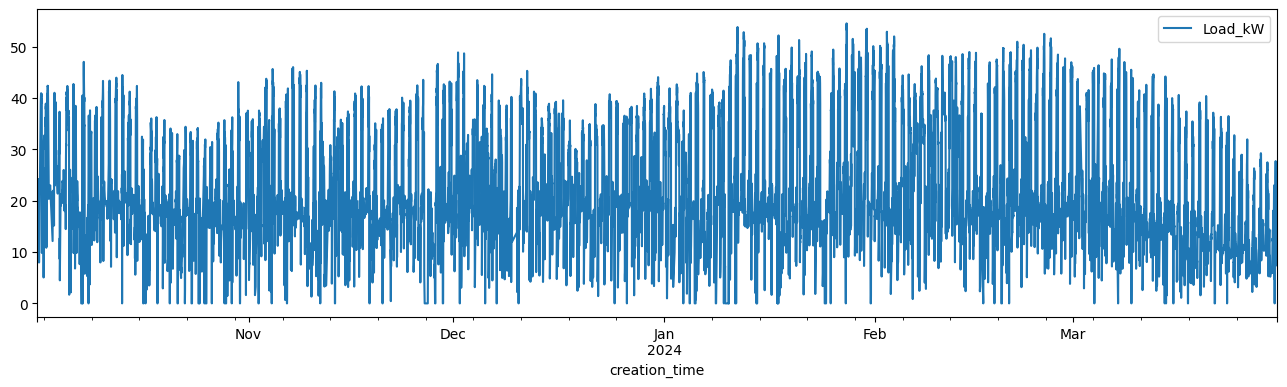

,Load_kW
creation_time,
2023-10-01 00:15:00,19.9233
2023-10-01 00:30:00,19.9911
2023-10-01 00:45:00,19.7322
2023-10-01 01:00:00,20.2622
2023-10-01 01:15:00,19.8744
...,...
2024-03-30 22:45:00,10.4722
2024-03-30 23:00:00,10.3067
2024-03-30 23:15:00,10.0856


In [3]:
resample_df = data.resample(rule="15 min").asfreq()
print("at start: ",resample_df.isna().sum())
# Fill NaN values in each column with the mean of that column
# resample_df = resample_df.fillna(resample_df.mean())
resample_df.interpolate(method="linear", inplace=True)
print("at end: ",resample_df.isna().sum())
plt.figure(figsize=(16, 4))
resample_df.plot(ax=plt.gca())  # This uses the current axes
# plt.title(col)
plt.show()
resample_df

from_date:  2023-10-01 to_date:  2024-03-30
holidays_lst: [datetime.date(2023, 10, 1), datetime.date(2023, 10, 2), datetime.date(2023, 10, 8), datetime.date(2023, 10, 15), datetime.date(2023, 10, 22), datetime.date(2023, 10, 29), datetime.date(2023, 11, 5), datetime.date(2023, 11, 12), datetime.date(2023, 11, 19), datetime.date(2023, 11, 26), datetime.date(2023, 12, 3), datetime.date(2023, 12, 10), datetime.date(2023, 12, 17), datetime.date(2023, 12, 24), datetime.date(2023, 12, 25), datetime.date(2023, 12, 31), datetime.date(2024, 1, 7), datetime.date(2024, 1, 14), datetime.date(2024, 1, 21), datetime.date(2024, 1, 26), datetime.date(2024, 1, 28), datetime.date(2024, 2, 4), datetime.date(2024, 2, 11), datetime.date(2024, 2, 18), datetime.date(2024, 2, 25), datetime.date(2024, 3, 3), datetime.date(2024, 3, 10), datetime.date(2024, 3, 17), datetime.date(2024, 3, 24), datetime.date(2024, 3, 25), datetime.date(2024, 3, 29)]


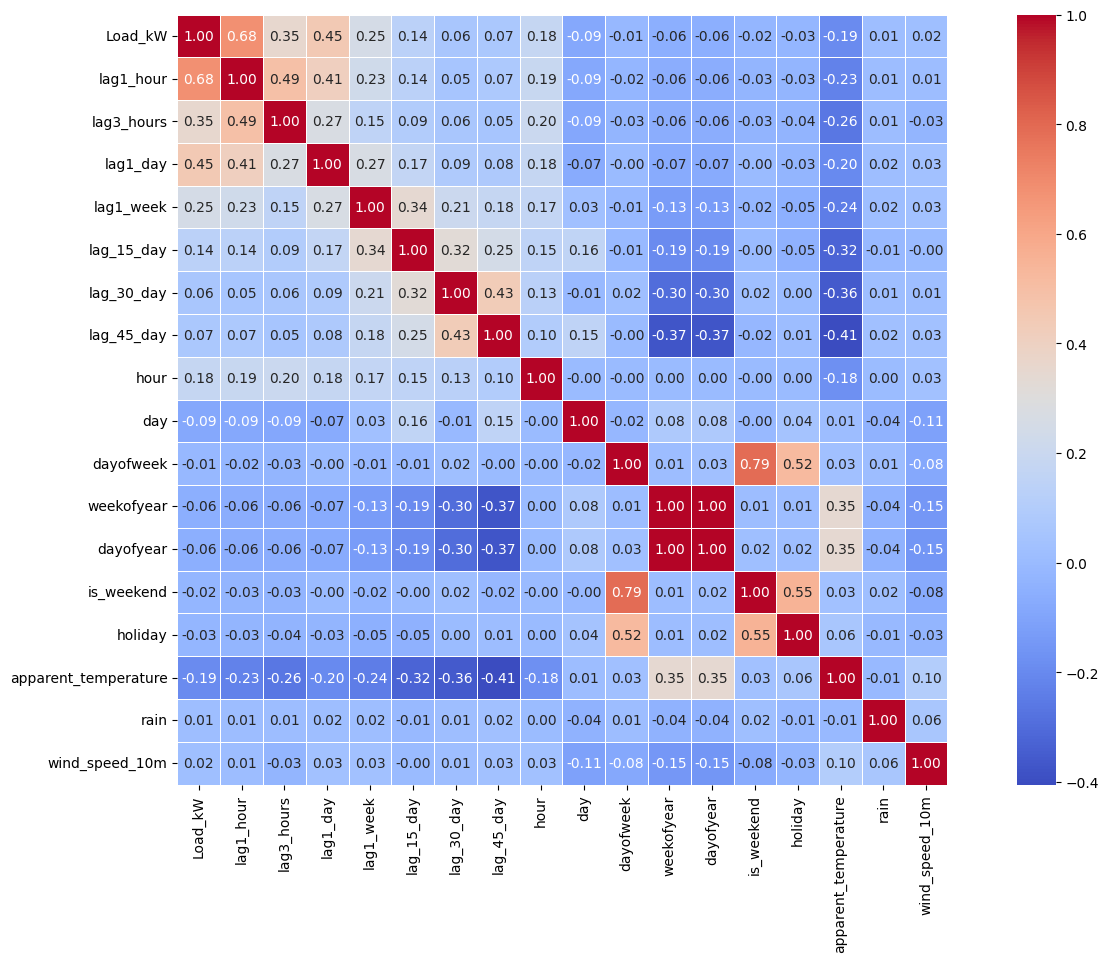

,Load_kW,lag1_hour,lag3_hours,lag1_day,lag1_week,lag_15_day,lag_30_day,lag_45_day,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,apparent_temperature,rain,wind_speed_10m
0,19.9233,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
1,19.9911,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
2,19.7322,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
3,20.2622,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,6,39,274,1,1,26.2000,0.0000,7.6000
4,19.8744,19.9233,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,6,39,274,1,1,26.2000,0.0000,7.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,10.7222,12.0229,7.3756,8.6475,10.1411,11.8656,16.2156,17.0456,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17464,10.0433,12.8400,10.5589,7.4969,9.9933,11.7286,18.1967,15.9422,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17465,10.5167,12.3656,11.4844,6.3462,9.9178,11.2280,19.4878,16.1611,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17466,10.4722,11.6033,12.1789,5.1956,10.4311,10.7275,19.1189,15.8344,22,30,5,13,90,1,0,20.1000,0.0000,6.8000


In [4]:
from common_functions import NPCL, common
npcl_obj = NPCL()
common_obj  = common()
# df1 = common_obj.add_lags(resample_df,target_col="Load_kW")
# df2 = common_obj.create_features(df1)

latitude, longitude = "28.625361","77.376214"#, 28.628059,77.378912
from_date = resample_df.first_valid_index().date()
to_date = resample_df.last_valid_index().date()
print("from_date: ",from_date,"to_date: ",to_date)
weather_df = npcl_obj.weather_data_api(latitude,longitude,from_date,to_date,duration="15min")

holidays_lst= common_obj.holidays_list(from_date,to_date)
print("holidays_lst:",holidays_lst)

df_lags = common_obj.add_lags(resample_df,target_col="Load_kW",large_data=True)
df2 = common_obj.create_features(df_lags)
for date in holidays_lst:
    df2.loc[f"{date}", 'holiday'] = 1
df2.fillna(0,inplace= True)
df3 = df2.merge(weather_df,on=["creation_time"])
df3.drop(['creation_time'],axis=1,inplace=True)
common_obj.correlation_matrix(df3)
df3

Initial Train Score 0.915667048953825
Best Parameters: {'subsample': 0.6, 'reg_alpha': 0.01, 'n_estimators': 250, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.2}
TRAIN SCORE with hyperparameters tunning: 0.568619951107

Model Power Evaluation
Mean Squared Error (MSE): 71.95808856540052
Mean Absolute Error (MAE): 5.752007577883727
R-squared: 0.44995105135026825
Root Mean Squared Error (RMSE): 8.4828113597675


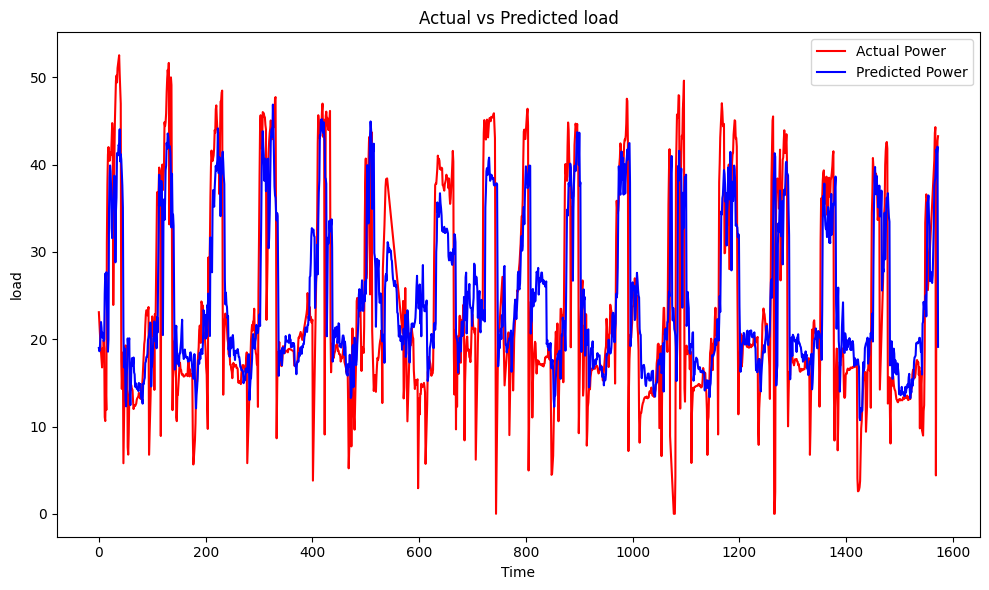


Model Power Evaluation
Mean Squared Error (MSE): 56.17543025644164
Mean Absolute Error (MAE): 5.413568936418533
R-squared: 0.2894707556319761
Root Mean Squared Error (RMSE): 7.4950270350707635


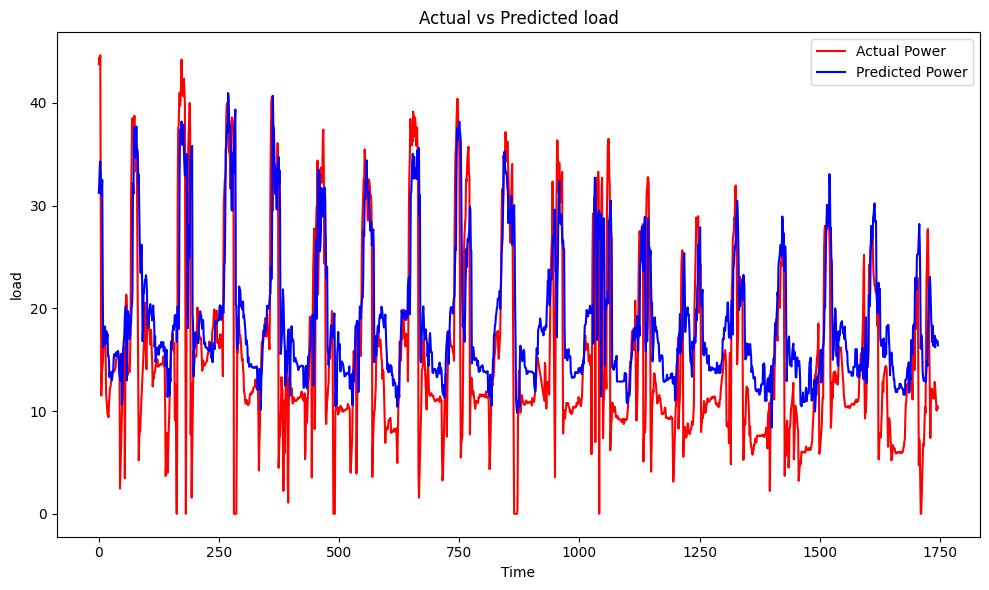

In [5]:
train_dataset,test_dataset = common_obj.data_split_function(df3, target_variable= "Load_kW")
# X_train = common_obj.scaling_layer(X_train)
model= common_obj.model_trainer(train_dataset, target_variable= "Load_kW",random_state=False ,model_name="XGboost")
test_label = test_dataset.pop("Load_kW")
pred = common_obj.prediction(model, test_dataset, scoring=True, test_data=test_label,prediction=True)



Initial Train Score 0.9169438297629969
Best Parameters: {'subsample': 0.2, 'reg_alpha': 0.01, 'n_estimators': 650, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
TRAIN SCORE with hyperparameters tunning: 0.6102039502399327

Model Power Evaluation
Mean Squared Error (MSE): 55.83862841189574
Mean Absolute Error (MAE): 5.1559872675705805
R-squared: 0.573647860722852
Root Mean Squared Error (RMSE): 7.472524902059259


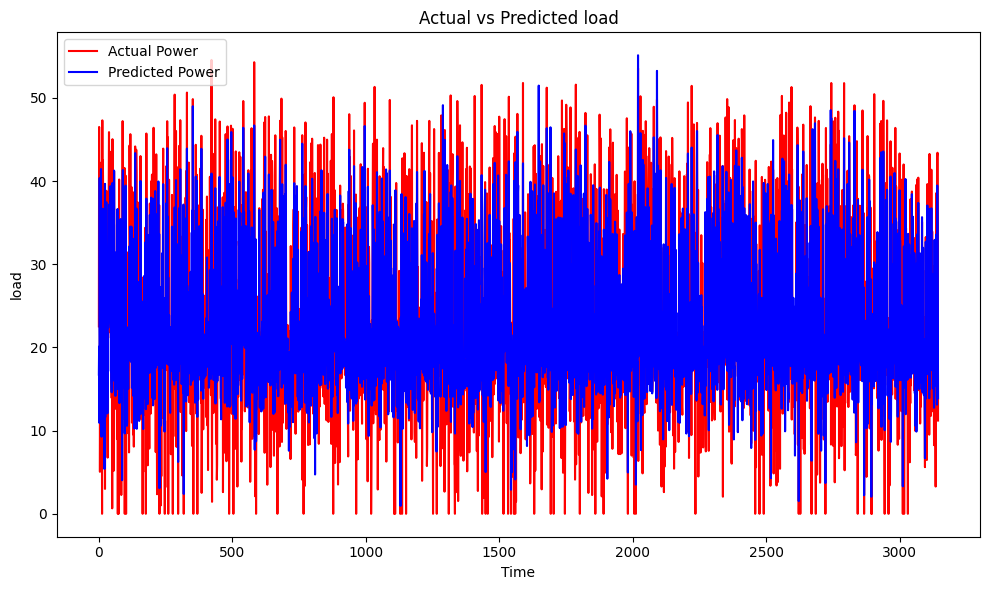


Model Power Evaluation
Mean Squared Error (MSE): 60.13031324980377
Mean Absolute Error (MAE): 5.481005878716235
R-squared: 0.23944781834409812
Root Mean Squared Error (RMSE): 7.754373814164737


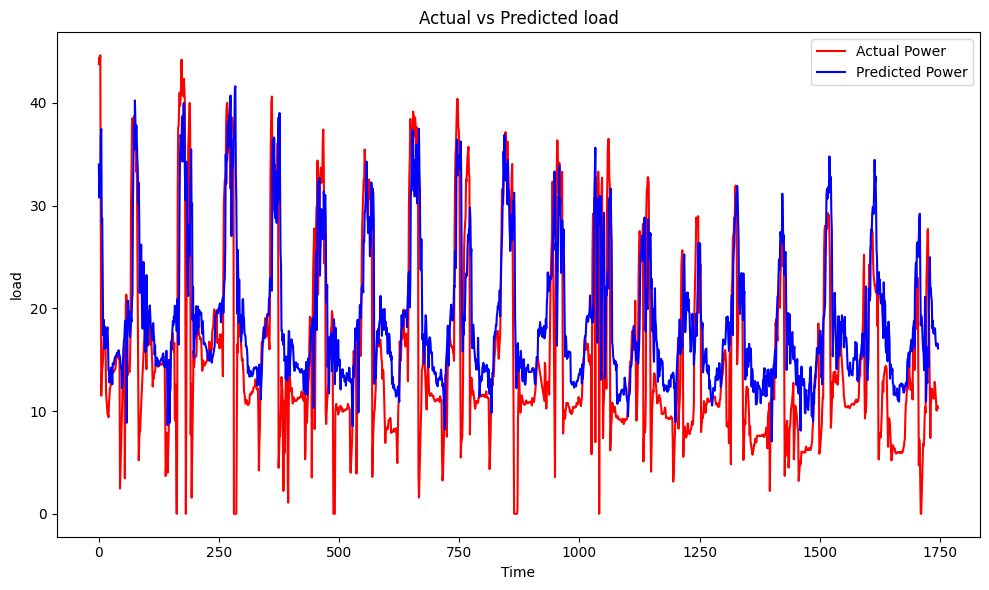

In [6]:
train_dataset,test_dataset = common_obj.data_split_function(df3, target_variable= "Load_kW")
# X_train = common_obj.scaling_layer(X_train)
model= common_obj.model_trainer(train_dataset, target_variable= "Load_kW" ,model_name="XGboost")
test_label = test_dataset.pop("Load_kW")
pred = common_obj.prediction(model, test_dataset, scoring=True, test_data=test_label,prediction=True)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Model Power Evaluation
Mean Squared Error (MSE): 37.58207636961423
Mean Absolute Error (MAE): 3.868151380936377
R-squared: 0.7130445515160857
Root Mean Squared Error (RMSE): 6.130422201579123


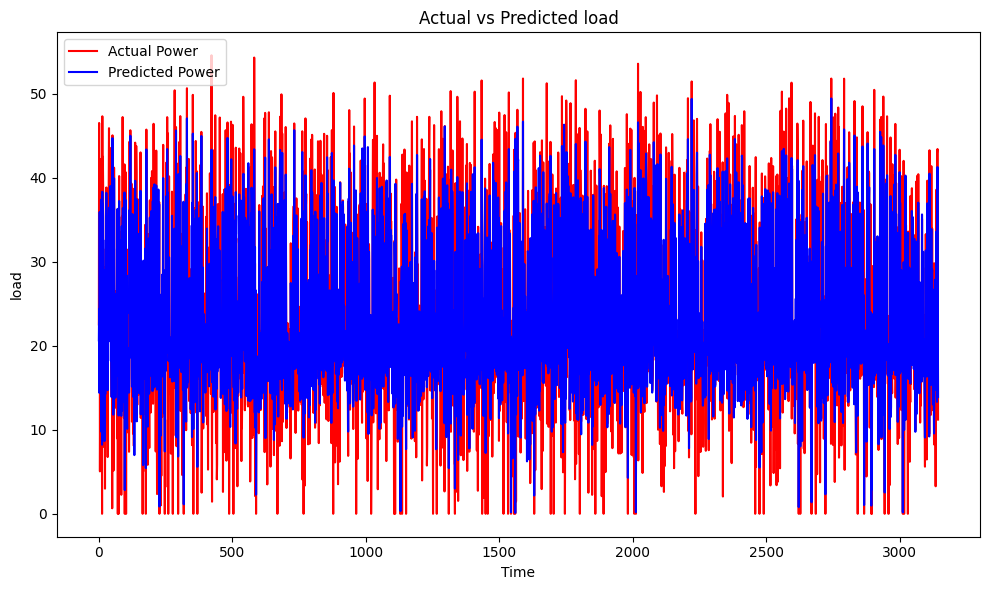


Model Power Evaluation
Mean Squared Error (MSE): 61.6046757319825
Mean Absolute Error (MAE): 5.570130799872916
R-squared: 0.2207994937010146
Root Mean Squared Error (RMSE): 7.848864614196279


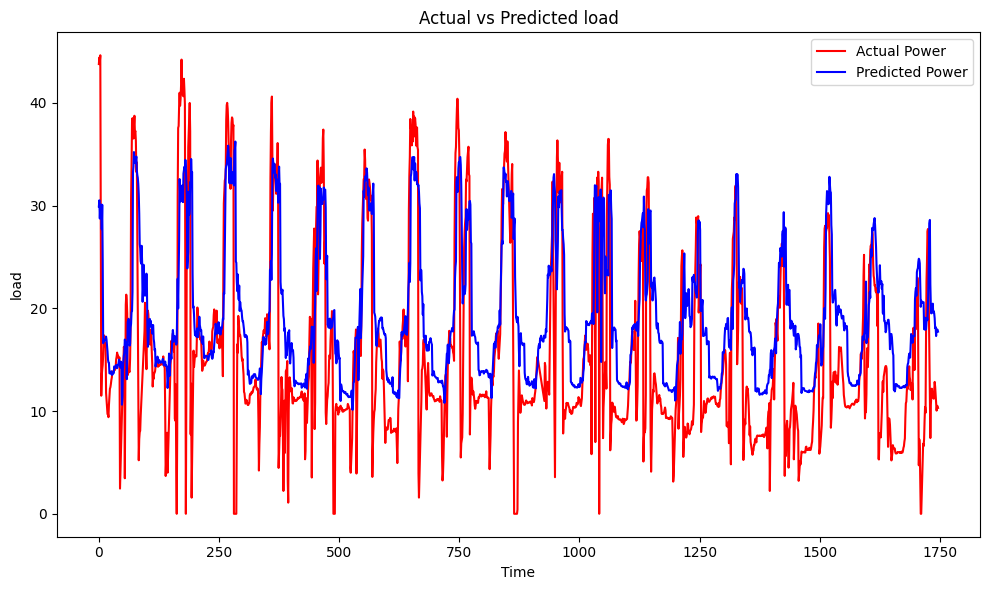

In [7]:
train_dataset,test_dataset = common_obj.data_split_function(df3, target_variable= "Load_kW")
# X_train = common_obj.scaling_layer(X_train)
model= common_obj.model_trainer(train_dataset, target_variable= "Load_kW" ,model_name="RFR")
test_label = test_dataset.pop("Load_kW")
pred = common_obj.prediction(model, test_dataset, scoring=True, test_data=test_label,prediction=True)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}

Model Power Evaluation
Mean Squared Error (MSE): 69.48744516813504
Mean Absolute Error (MAE): 5.790425059127252
R-squared: 0.46883669478865864
Root Mean Squared Error (RMSE): 8.335912977480934


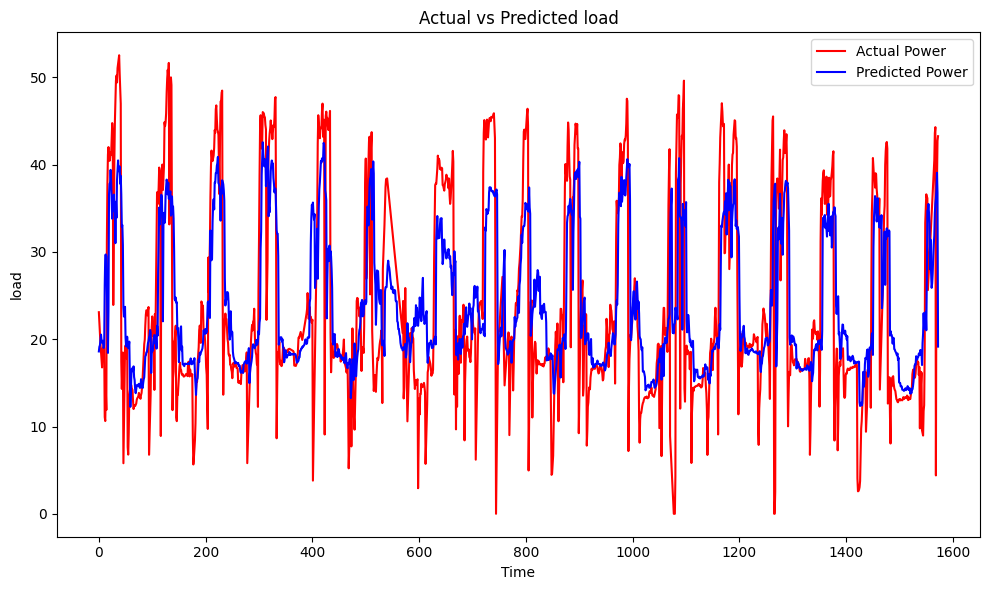


Model Power Evaluation
Mean Squared Error (MSE): 60.88275010166963
Mean Absolute Error (MAE): 5.611594879958796
R-squared: 0.22993069697359303
Root Mean Squared Error (RMSE): 7.802739909907905


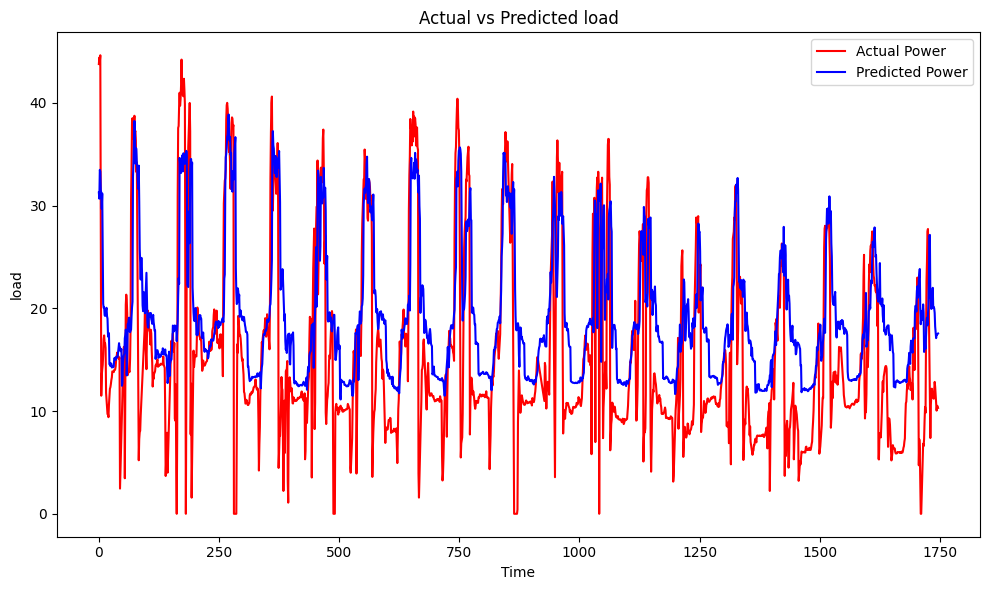

In [8]:
train_dataset,test_dataset = common_obj.data_split_function(df3, target_variable= "Load_kW")
# X_train = common_obj.scaling_layer(X_train)
model= common_obj.model_trainer(train_dataset, target_variable= "Load_kW",random_state=False ,model_name="RFR")
test_label = test_dataset.pop("Load_kW")
pred = common_obj.prediction(model, test_dataset, scoring=True, test_data=test_label,prediction=True)



In [9]:
test_dataset

,lag1_hour,lag3_hours,lag1_day,lag1_week,lag_15_day,lag_30_day,lag_45_day,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,apparent_temperature,rain,wind_speed_10m
15721,29.5125,35.5453,41.8322,17.1556,39.8378,25.8056,54.5656,18,12,1,11,72,0,0,17.6000,0.0000,15.5000
15722,38.1088,36.7851,12.6310,20.7778,47.5367,22.4680,53.2756,18,12,1,11,72,0,0,17.6000,0.0000,15.5000
15723,42.7400,38.0249,12.9272,23.1622,50.0011,20.4323,53.3722,19,12,1,11,72,0,0,16.8000,0.0000,13.3000
15724,43.2610,39.2647,13.2233,25.6233,49.1133,18.3967,53.7289,19,12,1,11,72,0,0,16.8000,0.0000,13.3000
15725,43.7812,40.5044,15.6433,25.6844,29.1700,19.0478,53.4967,19,12,1,11,72,0,0,16.8000,0.0000,13.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,12.0229,7.3756,8.6475,10.1411,11.8656,16.2156,17.0456,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17464,12.8400,10.5589,7.4969,9.9933,11.7286,18.1967,15.9422,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17465,12.3656,11.4844,6.3462,9.9178,11.2280,19.4878,16.1611,22,30,5,13,90,1,0,20.1000,0.0000,6.8000
17466,11.6033,12.1789,5.1956,10.4311,10.7275,19.1189,15.8344,22,30,5,13,90,1,0,20.1000,0.0000,6.8000


In [7]:
# target_variable = "Load_kW"
# dataset_scalled = common_obj.scaling_layer(datset=df3)
# train_features, test_features = common_obj.data_split_function(dataset=dataset_scalled)
# train_labels = train_features.pop(target_variable)
# test_labels = test_features.pop(target_variable)

In [8]:
# train_features

In [9]:
train_dataset, test_dataset = common_obj.data_split_function(dataset=df3)
train_dataset

,Load_kW,lag1_hour,lag3_hours,lag1_day,lag1_week,lag_15_day,lag_30_day,lag_45_day,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,apparent_temperature,rain,wind_speed_10m
0,19.9233,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
1,19.9911,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
2,19.7322,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,6,39,274,1,1,25.6000,0.0000,8.0000
3,20.2622,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,6,39,274,1,1,26.2000,0.0000,7.6000
4,19.8744,19.9233,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,1,6,39,274,1,1,26.2000,0.0000,7.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,4.3970,39.2647,29.3464,35.2967,44.6638,49.8556,25.4533,50.3978,17,12,1,11,72,0,0,18.0000,0.0000,17.9000
15717,29.5125,40.5044,30.5861,39.9800,41.8633,50.8578,21.4100,49.0733,17,12,1,11,72,0,0,18.0000,0.0000,17.9000
15718,38.1088,43.6170,31.8259,41.5622,41.8456,50.0922,14.6411,46.9589,17,12,1,11,72,0,0,18.0000,0.0000,17.9000
15719,42.7400,44.2989,33.0657,42.4311,9.2344,51.6556,21.9550,48.5150,18,12,1,11,72,0,0,17.6000,0.0000,15.5000



Model Power Evaluation
Mean Squared Error (MSE): 77.58712207160787
Mean Absolute Error (MAE): 5.985249389019619
R-squared: 0.4069226159966889


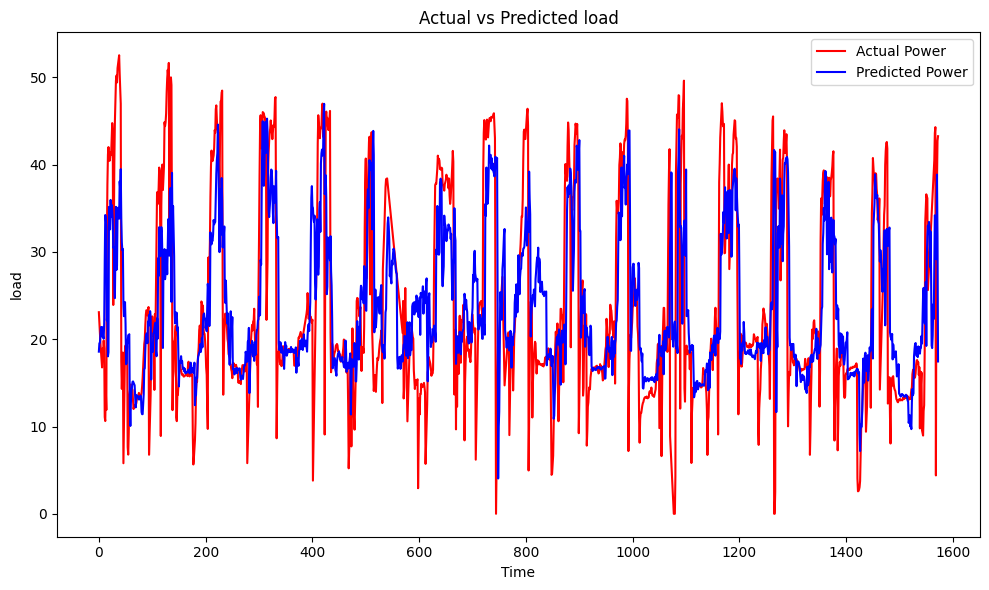

In [10]:
model = common_obj.model_trainer(train_dataset,target_variable="Load_kW",model_name= "RFR")

In [25]:
def feature_label_extraction(self,dataset,target_variable):
    try:
        dataset_features = dataset.copy()
        dataset_label = dataset_features.pop(target_variable)
        return dataset_features, dataset_label
    except Exception as e:
        logger.info("error in feature label extraction",exc_info= True)
test_label = test_dataset.pop("Load_kW")


Model Power Evaluation
Mean Squared Error (MSE): 110.03873322617183
Mean Absolute Error (MAE): 7.077976285527735
R-squared: -0.39181378074876183


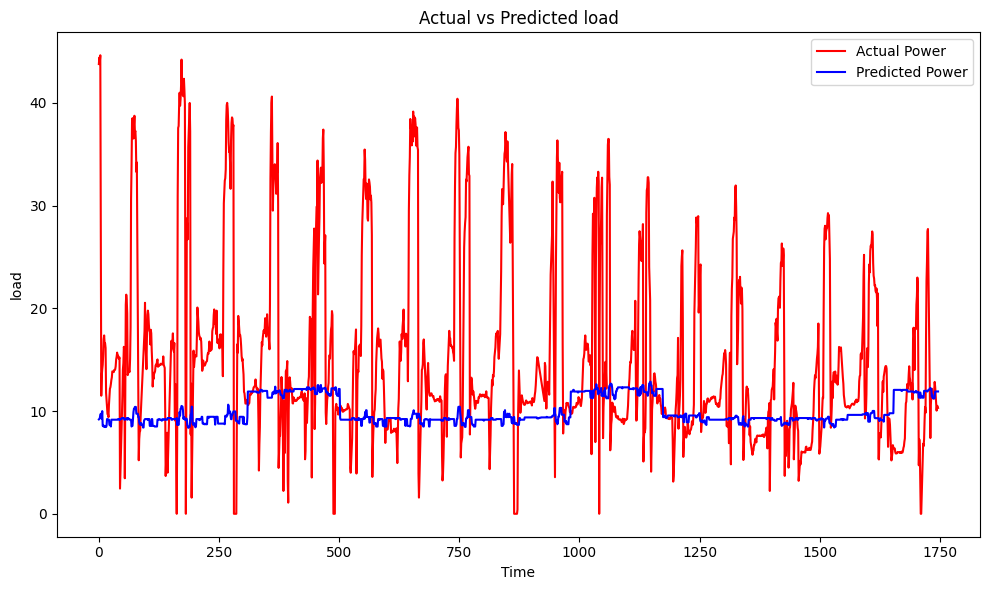

array([ 9.19 ,  9.234,  9.329, ..., 11.906, 11.906, 11.906])

In [26]:
common_obj.prediction(model,test_dataset,scoring=True,test_data=test_label,prediction=True)

In [9]:
import numpy as np

df4 = df3.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_normalize = ['lag1_hour', 'lag2_hours', 'lag3_hours', 'lag6_hours',
       'lag12_hours', 'lag1_day', 'lag1_week', 'lag_15_day', 'lag_30_day',
       'lag_45_day', 'hour', 'day', 'dayofweek', 'weekofyear', 'dayofyear',
       'is_weekend', 'holiday', 'temperature_2m', 'relative_humidity_2m',
       'apparent_temperature', 'precipitation', 'rain', 'wind_speed_10m',
       'wind_speed_100m']
df4[features_to_normalize] = scaler.fit_transform(df4[features_to_normalize])

df4['hour_sin'] = np.sin(2 * np.pi * df4['hour'] / 24)
df4['hour_cos'] = np.cos(2 * np.pi * df4['hour'] / 24)
df4['day_sin'] = np.sin(2 * np.pi * df4['day'] / 31)  # Assuming day is between 1-31
df4['day_cos'] = np.cos(2 * np.pi * df4['day'] / 31)
df4

,Load_kW,lag1_hour,lag2_hours,lag3_hours,lag6_hours,lag12_hours,lag1_day,lag1_week,lag_15_day,lag_30_day,lag_45_day,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,holiday,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m,hour_sin,hour_cos,day_sin,day_cos
0,8.9100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4783,0.4000,0.5000,0.5294,0.5302,0.0000,0.0000,0.8208,0.6543,0.8440,0.1832,0.1832,0.4071,0.3632,0.1249,0.9922,0.0810,0.9967
1,9.9363,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4783,0.4000,0.5000,0.5294,0.5302,0.0000,0.0000,0.8208,0.6543,0.8440,0.1832,0.1832,0.4071,0.3632,0.1249,0.9922,0.0810,0.9967
2,12.7100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5217,0.4000,0.5000,0.5294,0.5302,0.0000,0.0000,0.8035,0.6914,0.8463,0.1679,0.1679,0.2920,0.2778,0.1362,0.9907,0.0810,0.9967
3,15.5560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5217,0.4000,0.5000,0.5294,0.5302,0.0000,0.0000,0.8035,0.6914,0.8463,0.1679,0.1679,0.2920,0.2778,0.1362,0.9907,0.0810,0.9967
4,15.0633,0.1633,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5217,0.4000,0.5000,0.5294,0.5302,0.0000,0.0000,0.8035,0.6914,0.8463,0.1679,0.1679,0.2920,0.2778,0.1362,0.9907,0.0810,0.9967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25098,10.7222,0.2203,0.2157,0.1352,0.1665,0.3120,0.1585,0.1859,0.2175,0.2972,0.3124,0.9565,0.9667,0.8333,0.2353,0.2445,1.0000,0.0000,0.5116,0.4568,0.4586,0.0000,0.0000,0.2006,0.2201,0.2478,0.9688,0.1947,0.9809
25099,10.0433,0.2353,0.2159,0.1935,0.1907,0.3319,0.1374,0.1831,0.2149,0.3335,0.2922,0.9565,0.9667,0.8333,0.2353,0.2445,1.0000,0.0000,0.5116,0.4568,0.4586,0.0000,0.0000,0.2006,0.2201,0.2478,0.9688,0.1947,0.9809
25100,10.5167,0.2266,0.2073,0.2105,0.1802,0.3164,0.1163,0.1818,0.2058,0.3571,0.2962,0.9565,0.9667,0.8333,0.2353,0.2445,1.0000,0.0000,0.5116,0.4568,0.4586,0.0000,0.0000,0.2006,0.2201,0.2478,0.9688,0.1947,0.9809
25101,10.4722,0.2126,0.2053,0.2232,0.3150,0.2565,0.0952,0.1912,0.1966,0.3504,0.2902,0.9565,0.9667,0.8333,0.2353,0.2445,1.0000,0.0000,0.5116,0.4568,0.4586,0.0000,0.0000,0.2006,0.2201,0.2478,0.9688,0.1947,0.9809



Model Power Evaluation
Mean Squared Error (MSE): 29.52645407139842
Mean Absolute Error (MAE): 2.995644762283601
R-squared: 0.7816427841813449


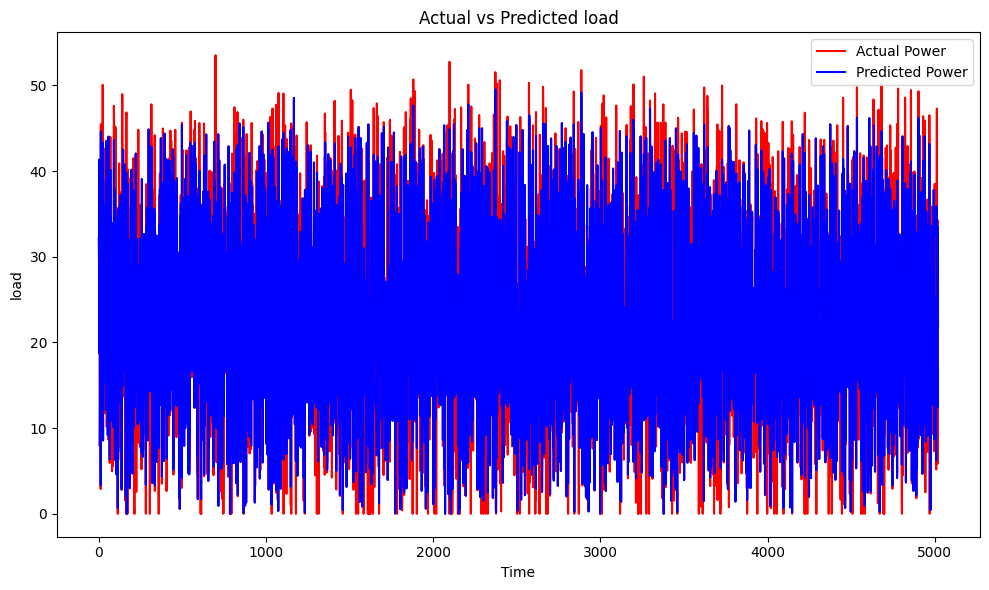

In [10]:

model = common_obj.model_trainer(df4)